In [2]:
import os
print(os.getcwd()) #Print the current working directory

C:\Users\rabab\Jupyter


In [10]:
import pandas as pd
elections = pd.read_csv("elections.txt")
elections

,Year,State,Candidate,Party,Votes,Percentage,Result
0,2020,California,Joe Biden,Democratic,11110250,63.5,win
1,2020,Texas,Donald Trump,Republican,5258126,52.1,win
2,2020,Florida,Donald Trump,Republican,5668731,51.2,loss
3,2016,California,Hillary Clinton,Democratic,8753788,61.7,loss
4,2016,Texas,Donald Trump,Republican,4685047,52.2,win
5,2016,Florida,Donald Trump,Republican,4617886,49.1,loss


In [6]:
elections['Percentage'].groupby(elections['Party'])

In [7]:
elections['Percentage'].groupby(elections['Party']).groups

{'Democratic': [0, 3], 'Republican': [1, 2, 4, 5]}

In [8]:
elections['Percentage'].groupby(elections['Party']).mean() # th mean % of each potical party

Party
Democratic    62.60
Republican    51.15
Name: Percentage, dtype: float64

In [9]:
elections['Percentage'].mean() # The mean % across all politcal parties not the mean % of each party

np.float64(54.96666666666667)

In [10]:
elections['Percentage'].groupby(elections['Party']).max() # the max % of each polictal party

Party
Democratic    63.5
Republican    52.2
Name: Percentage, dtype: float64

In [11]:
elections['Percentage'].groupby(elections['Party']).min() # the min % of each polictal party

Party
Democratic    61.7
Republican    49.1
Name: Percentage, dtype: float64

In [12]:
elections['Percentage'].groupby(elections['Party']).size() # Count # of each party

Party
Democratic    2
Republican    4
Name: Percentage, dtype: int64

In [13]:
elections['Percentage'].groupby(elections['Party']).first() # the first entry % of each party in the original order of dataset

Party
Democratic    63.5
Republican    52.1
Name: Percentage, dtype: float64

# Grouping a series by multiple series

In [20]:
elections = pd.read_csv("elections.txt") # After adding a new column 'Result', read the file again to see changes
elections

,Year,State,Candidate,Party,Votes,Percentage,Result
0,2020,California,Joe Biden,Democratic,11110250,63.5,win
1,2020,Texas,Donald Trump,Republican,5258126,52.1,win
2,2020,Florida,Donald Trump,Republican,5668731,51.2,loss
3,2016,California,Hillary Clinton,Democratic,8753788,61.7,loss
4,2016,Texas,Donald Trump,Republican,4685047,52.2,win
5,2016,Florida,Donald Trump,Republican,4617886,49.1,loss


In [22]:
elections['Percentage'].groupby([elections['Party'],elections['Result']]) # we will get series group of objects

In [23]:
elections['Percentage'].groupby([elections['Party'],elections['Result']]).groups 

{('Democratic', 'loss'): [3], ('Democratic', 'win'): [0], ('Republican', 'loss'): [2, 5], ('Republican', 'win'): [1, 4]}

In [27]:
(elections['Percentage']
 .groupby([elections['Party'],elections['Result']]) # the mean % of each party for win and lose in series
 .mean()
)  

Party       Result
Democratic  loss      61.70
            win       63.50
Republican  loss      50.15
            win       52.15
Name: Percentage, dtype: float64

In [29]:
(elections['Percentage']
 .groupby([elections['Party'],elections['Result']]) # the mean % of each party for win and lose in series
 .mean()
 .iloc[0] # Get the first number in the series which is 61.7 in the above table
) 

np.float64(61.7)

In [33]:
(elections['Percentage']
 .groupby([elections['Party'],elections['Result']]) # the mean % of each party for win and lose in series
 .mean()
 .loc['Democratic', 'win'] # Get the number in Democratic when it is 'win' in the above table
)

np.float64(63.5)

In [35]:
(elections['Percentage']
 .groupby([elections['Party'],elections['Result']]) # the mean % of each party for win and lose in series
 .mean()
 .loc['Democratic'] # Get the numbers in Democratic when it is 'win' and 'loss' in series
)

Result
loss    61.7
win     63.5
Name: Percentage, dtype: float64

# Grouping a dataframe by a series

In [41]:
elections.groupby('Party') # Shows dataframe groupby object

In [51]:
elections.groupby('Party').groups # the same as elections['Percentage'].groupby(elections['Party']).groups

{'Democratic': [0, 3], 'Republican': [1, 2, 4, 5]}

In [33]:
(elections['Percentage']
 .groupby([elections['Party'],elections['Result']]) # the mean % of each party for win and lose in series
 .mean()
 .loc['Democratic', 'win'] # Get the number in Democratic when it is 'win' in the above table
)

np.float64(63.5)

### the data will not belong to each other and that will lead to data lose

In [49]:
elections.groupby('Party').max() # shows party as label and the remaining columns still columns as it will get the max # without caring about data to be related

,Year,State,Candidate,Votes,Percentage,Result
Party,,,,,,
Democratic,2020,California,Joe Biden,11110250,63.5,win
Republican,2020,Texas,Donald Trump,5668731,52.2,win


In [50]:
elections.groupby('Party').min() # as it will get the min # without caring about data to be related

,Year,State,Candidate,Votes,Percentage,Result
Party,,,,,,
Democratic,2016,California,Hillary Clinton,8753788,61.7,loss
Republican,2016,Florida,Donald Trump,4617886,49.1,loss


# Grouping dataframe by multiple series

In [68]:
elections.groupby(['Party','Result']).max() # Notice: the indices are bold

Year       State        Candidate     Votes  Percentage
Party      Result                                                         
Democratic loss    2016  California  Hillary Clinton   8753788        61.7
           win     2020  California        Joe Biden  11110250        63.5
Republican loss    2020     Florida     Donald Trump   5668731        51.2
           win     2020       Texas     Donald Trump   5258126        52.2

In [69]:
(elections
 .groupby(['Party','Result'])['Percentage'] 
 .mean() # the mean % of each party for win and lose in series
 .loc['Democratic', 'loss'] # Get the # of % in Democratic when it is 'loss' in the above table
)

np.float64(61.7)

In [91]:
# (elections
#  .groupby(['Party', 'Result'])
#  .reset_index()
#  .set_index('Party')
# )

In [96]:
import numpy as np
elections.pivot_table(
    index = 'Party',
    columns = 'Result', # Rotate the Result to the top of the table
    values = 'Percentage',
    aggfunc = np.mean
)

C:\Users\rabab\AppData\Local\Temp\ipykernel_8912\2857689778.py:2: FutureWarning: The provided callable <function mean at 0x00000218664EF4C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  elections.pivot_table(


Result,loss,win
Party,,
Democratic,61.70,63.50
Republican,50.15,52.15


# isin

In [106]:
elections[elections['Party'].isin(['Republican','Decomratic'])]

,Year,State,Candidate,Party,Votes,Percentage,Result
1,2020,Texas,Donald Trump,Republican,5258126,52.1,win
2,2020,Florida,Donald Trump,Republican,5668731,51.2,loss
4,2016,Texas,Donald Trump,Republican,4685047,52.2,win
5,2016,Florida,Donald Trump,Republican,4617886,49.1,loss


# Baby names case study

In [11]:
baby = pd.read_csv("baby_names.csv")
baby

,name,sex,year,Birth Month,count,Height (cm),state,Country
0,Olivia,Female,2011,6,2.77,51.2,Chicago,USA
1,Charlotte,Female,2014,12,4.40,54.8,Phoenix,UK
2,Benjamin,Female,2022,5,2.57,47.6,Houston,Australia
3,Sophia,Male,2013,6,2.64,51.8,Los Angeles,UK
4,Henry,Male,2016,2,4.32,51.3,New York,UK
...,...,...,...,...,...,...,...,...
995,Amelia,Female,2018,8,2.68,52.0,Chicago,USA
996,Liam,Female,2014,6,2.68,45.8,San Diego,Australia
997,Mason,Male,2014,2,3.36,53.0,San Antonio,USA
998,Ava,Male,2020,7,2.92,49.4,Los Angeles,Australia


In [12]:
baby.groupby('year').size() # shows # of unique names as size() count # of rows within each group

year
2010    62
2011    76
2012    79
2013    85
2014    73
2015    83
2016    71
2017    74
2018    66
2019    55
2020    74
2021    65
2022    61
2023    76
dtype: int64

<Axes: xlabel='year'>

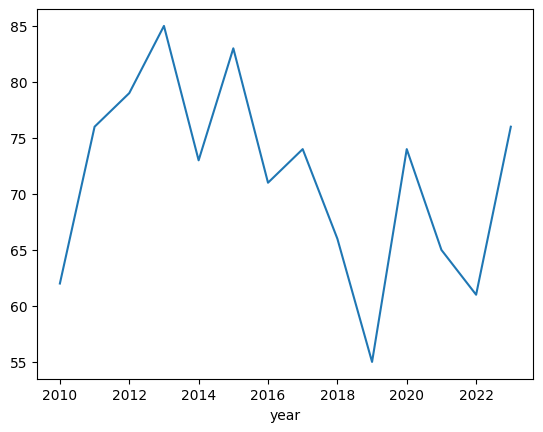

In [15]:
import matplotlib.pyplot as plt
baby.groupby('year').size().plot() # Graph # of unique data

## Grouping mulitple columns

In [17]:
baby.groupby(['year','sex']).size() # unique names for every year and every sex

year  sex   
2010  Female    27
      Male      35
2011  Female    36
      Male      40
2012  Female    39
      Male      40
2013  Female    37
      Male      48
2014  Female    37
      Male      36
2015  Female    39
      Male      44
2016  Female    37
      Male      34
2017  Female    27
      Male      47
2018  Female    34
      Male      32
2019  Female    27
      Male      28
2020  Female    38
      Male      36
2021  Female    34
      Male      31
2022  Female    28
      Male      33
2023  Female    42
      Male      34
dtype: int64

In [20]:
baby.groupby(['year','sex']).first() # the first row in every group in the dataset and shows the most popular names if the data count is stored in descending

name  Birth Month  count  Height (cm)         state  \
year sex                                                                
2010 Female        Mia            9   3.65         45.7   San Antonio   
     Male     Benjamin           10   4.37         49.7     San Diego   
2011 Female     Olivia            6   2.77         51.2       Chicago   
     Male        Lucas            5   2.83         49.8       Houston   
2012 Female        Mia            4   3.12         50.8       Houston   
     Male         Noah            3   3.05         46.3      New York   
2013 Female   Isabella            2   3.64         47.0     San Diego   
     Male       Sophia            6   2.64         51.8   Los Angeles   
2014 Female  Charlotte           12   4.40         54.8       Phoenix   
     Male       Amelia            1   2.66         52.7      New York   
2015 Female     Evelyn            8   4.04         48.4       Chicago   
     Male        James            7   3.57         48.6       Houston   
2016 Female        Ava            4   3.03         52.5       Chicago   
     Male        Henry            2   4.32         51.3      New York   
2017 Female     Elijah            3   4.18         53.0   San Antonio   
     Male         Noah            8   4.47         51.7   San Antonio   
2018 Female       Emma            9   3.70         50.8  Philadelphia   
     Male          Mia            3   3.60         49.1      New York   
2019 Female     Sophia           12   3.88         53.6       Chicago   
     Male         Emma           10   4.38         46.6   San Antonio   
2020 Female     Oliver            5   3.14         47.8   San Antonio   
     Male          Mia            6   3.69         54.3      New York   
2021 Female     Evelyn           10   4.36         53.9     San Diego   
     Male        Henry            8   3.98         49.1   Los Angeles   
2022 Female   Benjamin            5   2.57         47.6       Houston   
     Male         Emma            5   2.69         52.5     San Diego   
2023 Female     Evelyn           12   3.39         46.7     San Diego   
     Male        Mason           10   2.89         53.4     San Diego   

               Country  
year sex                
2010 Female         UK  
     Male       Canada  
2011 Female        USA  
     Male          USA  
2012 Female     Canada  
     Male    Australia  
2013 Female         UK  
     Male           UK  
2014 Female         UK  
     Male       Canada  
2015 Female  Australia  
     Male          USA  
2016 Female  Australia  
     Male           UK  
2017 Female     Canada  
     Male       Canada  
2018 Female  Australia  
     Male          USA  
2019 Female         UK  
     Male          USA  
2020 Female     Canada  
     Male       Canada  
2021 Female         UK  
     Male       Canada  
2022 Female  Australia  
     Male           UK  
2023 Female  Australia  
     Male          USA

In [22]:
baby.groupby(['year','sex']).max() # Shows names that come first in alphabetic, NOT RELATED to the highest count

name  Birth Month  count  Height (cm)        state Country
year sex                                                                 
2010 Female  Sophia           12   4.48         54.8    San Diego     USA
     Male    Sophia           12   4.47         54.9    San Diego     USA
2011 Female  Sophia           11   4.46         54.8    San Diego     USA
     Male    Sophia           12   4.50         53.8    San Diego     USA
2012 Female  Sophia           12   4.50         54.9    San Diego     USA
     Male    Sophia           12   4.48         54.4    San Diego     USA
2013 Female  Olivia           12   4.46         54.9    San Diego     USA
     Male    Sophia           12   4.49         54.7    San Diego     USA
2014 Female  Sophia           12   4.43         54.8    San Diego     USA
     Male    Sophia           12   4.47         54.8    San Diego     USA
2015 Female  Sophia           12   4.46         55.0    San Diego     USA
     Male    Sophia           12   4.48         54.8    San Diego     USA
2016 Female  Sophia           12   4.41         54.7    San Diego     USA
     Male    Sophia           11   4.49         55.0    San Diego     USA
2017 Female  Sophia           12   4.42         54.9  San Antonio     USA
     Male    Sophia           11   4.49         54.6    San Diego     USA
2018 Female  Sophia           12   4.46         54.9    San Diego     USA
     Male    Sophia           12   4.47         54.8    San Diego     USA
2019 Female  Sophia           12   4.48         54.7    San Diego     USA
     Male    Sophia           12   4.50         54.1    San Diego     USA
2020 Female  Sophia           12   4.42         54.5    San Diego     USA
     Male    Sophia           12   4.47         54.8    San Diego     USA
2021 Female  Sophia           12   4.36         54.7    San Diego     USA
     Male    Sophia           12   4.49         54.6    San Diego     USA
2022 Female  Sophia           12   4.48         54.9    San Diego     USA
     Male    Sophia           12   4.48         54.8    San Diego     USA
2023 Female  Sophia           12   4.48         54.8    San Diego     USA
     Male    Sophia           12   4.49         54.8    San Diego     USA

In [24]:
baby.pivot_table(
    index = 'sex', columns = 'year',
    values = 'name', aggfunc = lambda ns : ns.iloc[0], #lambda ns: Defines an anonymous function that takes a Pandas Series (or a grouped DataFrame column).
# ns.iloc[0] :- Returns the first element of the series
)

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
sex,,,,,,,,,,,,,,
Female,Mia,Olivia,Mia,Isabella,Charlotte,Evelyn,Ava,Elijah,Emma,Sophia,Oliver,Evelyn,Benjamin,Evelyn
Male,Benjamin,Lucas,Noah,Sophia,Amelia,James,Henry,Noah,Mia,Emma,Mia,Henry,Emma,Mason


<Axes: ylabel='Male'>

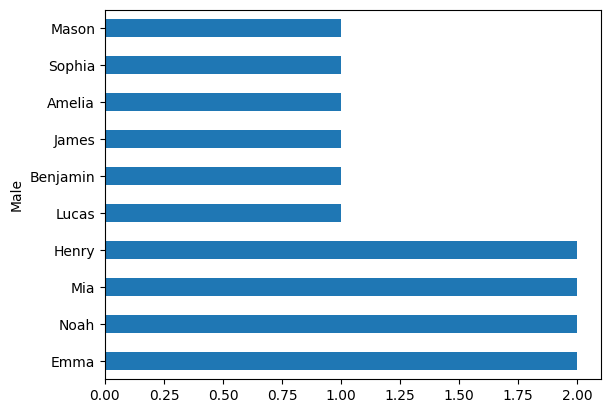

In [31]:
(baby.pivot_table(
    index = 'sex', columns = 'year',
    values = 'name', aggfunc = lambda ns : ns.iloc[0])
 .loc['Male']
 .value_counts() # how many times each name was unique and the numbers represent # of year that name was considered unique in it
 .plot(kind = 'barh')
)

<Axes: xlabel='year'>

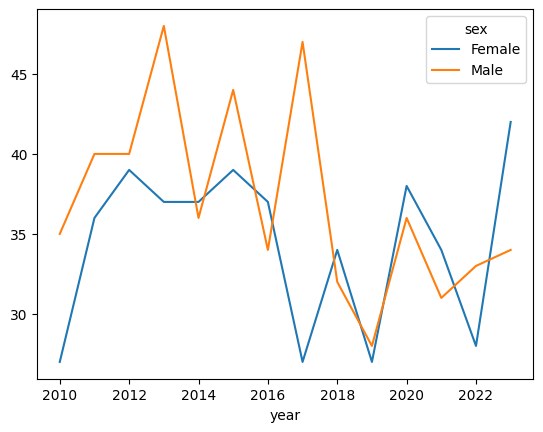

In [34]:
(baby.pivot_table(
    index = 'year', columns = 'sex',
    values = 'name', aggfunc = len) # gets # of unique names for each sex
    .plot() # gives a line char
    
)

## Compute letters from each name

In [36]:
baby

,name,sex,year,Birth Month,count,Height (cm),state,Country
0,Olivia,Female,2011,6,2.77,51.2,Chicago,USA
1,Charlotte,Female,2014,12,4.40,54.8,Phoenix,UK
2,Benjamin,Female,2022,5,2.57,47.6,Houston,Australia
3,Sophia,Male,2013,6,2.64,51.8,Los Angeles,UK
4,Henry,Male,2016,2,4.32,51.3,New York,UK
...,...,...,...,...,...,...,...,...
995,Amelia,Female,2018,8,2.68,52.0,Chicago,USA
996,Liam,Female,2014,6,2.68,45.8,San Diego,Australia
997,Mason,Male,2014,2,3.36,53.0,San Antonio,USA
998,Ava,Male,2020,7,2.92,49.4,Los Angeles,Australia


In [37]:
baby['name'].str[0] #gets the first letter of each elements

0      O
1      C
2      B
3      S
4      H
      ..
995    A
996    L
997    M
998    A
999    L
Name: name, Length: 1000, dtype: object

In [39]:
baby['name'].str.len() # show the lenght of each name

0      6
1      9
2      8
3      6
4      5
      ..
995    6
996    4
997    5
998    3
999    4
Name: name, Length: 1000, dtype: int64

In [41]:
baby['name'].str[-1] # gets the last letter of each name

0      a
1      e
2      n
3      a
4      y
      ..
995    a
996    m
997    n
998    a
999    m
Name: name, Length: 1000, dtype: object

In [42]:
baby.str[-1] # gives error because str is defiended on series of strings

AttributeError: 'DataFrame' object has no attribute 'str'

In [45]:
# Create new column last and fill it with the last letter or each name 
baby['last'] = baby['name'].str[-1]
baby

,name,sex,year,Birth Month,count,Height (cm),state,Country,last
0,Olivia,Female,2011,6,2.77,51.2,Chicago,USA,a
1,Charlotte,Female,2014,12,4.40,54.8,Phoenix,UK,e
2,Benjamin,Female,2022,5,2.57,47.6,Houston,Australia,n
3,Sophia,Male,2013,6,2.64,51.8,Los Angeles,UK,a
4,Henry,Male,2016,2,4.32,51.3,New York,UK,y
...,...,...,...,...,...,...,...,...,...
995,Amelia,Female,2018,8,2.68,52.0,Chicago,USA,a
996,Liam,Female,2014,6,2.68,45.8,San Diego,Australia,m
997,Mason,Male,2014,2,3.36,53.0,San Antonio,USA,n
998,Ava,Male,2020,7,2.92,49.4,Los Angeles,Australia,a


In [47]:
baby.groupby(['last', 'sex']).sum() # Shows # of babies born as we use sum() not size()

name    year  \
last sex                                                                 
a    Female  OliviaOliviaEmmaAmeliaIsabellaSophiaIsabellaEm...  322600   
     Male    SophiaEmmaMiaMiaAvaAmeliaEmmaMiaMiaOliviaAmeli...  385163   
e    Female  CharlotteCharlotteCharlotteCharlotteCharlotteC...   48392   
     Male    CharlotteCharlotteCharlotteCharlotteCharlotteC...   44350   
h    Female  ElijahElijahNoahElijahElijahElijahElijahNoahNo...   76663   
     Male    NoahElijahNoahNoahNoahElijahElijahElijahElijah...  112870   
m    Female  LiamLiamLiamLiamLiamLiamLiamLiamLiamLiamLiamLi...   60510   
     Male    LiamLiamLiamLiamLiamLiamLiamLiamLiamLiamLiamLi...   54452   
n    Female  BenjaminEvelynBenjaminEvelynBenjaminEvelynBenj...  165345   
     Male    BenjaminBenjaminMasonMasonMasonMasonBenjaminEv...  139147   
r    Female  OliverHarperAlexanderAlexanderOliverAlexanderA...  137108   
     Male    OliverHarperAlexanderOliverHarperAlexanderAlex...  145084   
s    Female  JamesJamesJamesJamesLucasLucasJamesJamesJamesJ...  116962   
     Male    LucasJamesLucasLucasLucasLucasJamesJamesLucasL...  100781   
y    Female  HenryHenryHenryHenryHenryHenryHenryHenryHenryH...   44370   
     Male    HenryHenryHenryHenryHenryHenryHenryHenryHenryH...   62541   

             Birth Month   count  Height (cm)  \
last sex                                        
a    Female         1007  563.46       7978.9   
     Male           1271  682.73       9544.5   
e    Female          154   82.37       1220.1   
     Male            141   82.01       1119.4   
h    Female          220  132.15       1924.6   
     Male            363  199.00       2802.8   
m    Female          176  106.63       1505.6   
     Male            170   93.22       1331.0   
n    Female          549  277.77       4114.4   
     Male            498  244.22       3435.0   
r    Female          412  243.82       3381.0   
     Male            455  254.22       3635.6   
s    Female          351  205.81       2868.7   
     Male            316  174.09       2506.3   
y    Female          139   74.89       1105.0   
     Male            182  111.62       1544.1   

                                                         state  \
last sex                                                         
a    Female  ChicagoNew YorkPhiladelphiaChicagoSan DiegoChi...   
     Male    Los AngelesSan DiegoNew YorkNew YorkSan Antoni...   
e    Female  PhoenixHoustonPhiladelphiaSan AntonioPhiladelp...   
     Male    PhiladelphiaNew YorkSan DiegoHoustonSan DiegoS...   
h    Female  ChicagoSan AntonioChicagoHoustonHoustonNew Yor...   
     Male    New YorkPhiladelphiaSan AntonioSan AntonioSan ...   
m    Female  New YorkSan DiegoSan DiegoHoustonLos AngelesLo...   
     Male    San AntonioHoustonChicagoSan AntonioSan DiegoC...   
n    Female  HoustonSan DiegoPhiladelphiaSan DiegoSan Diego...   
     Male    San DiegoSan DiegoSan DiegoChicagoLos AngelesC...   
r    Female  San AntonioPhoenixHoustonPhiladelphiaPhiladelp...   
     Male    HoustonNew YorkHoustonSan DiegoPhoenixPhiladel...   
s    Female  San AntonioNew YorkPhoenixNew YorkNew YorkPhoe...   
     Male    Los AngelesHoustonPhoenixHoustonHoustonSan Ant...   
y    Female  HoustonPhiladelphiaSan AntonioNew YorkChicagoP...   
     Male    New YorkSan AntonioLos AngelesSan DiegoSan Die...   

                                                       Country  
last sex                                                        
a    Female  USAAustraliaAustraliaCanadaUKUKUSAUKUKCanadaAu...  
     Male    UKUKCanadaUSACanadaCanadaUSAUKUSAUKUKAustralia...  
e    Female  UKCanadaAustraliaCanadaCanadaCanadaUKUKUKUSAUK...  
     Male    UKCanadaUSAUSACanadaUSAUSACanadaUKCanadaAustra...  
h    Female  UKCanadaUSACanadaCanadaCanadaCanadaAustraliaUK...  
     Male    AustraliaUKCanadaUKCanadaCanadaUKUKUSAAustrali...  
m    Female  USACanadaAustraliaUSAAustraliaAustraliaCanadaA...  
     Male    USAUKUSAUKAustraliaCanadaUSAUKUSAUKCanadaAustr...  
n  

In [51]:
(baby
 .groupby(['last','sex'])
 .sum().reset_index()
 .loc[:, 'count']
)

0     563.46
1     682.73
2      82.37
3      82.01
4     132.15
5     199.00
6     106.63
7      93.22
8     277.77
9     244.22
10    243.82
11    254.22
12    205.81
13    174.09
14     74.89
15    111.62
Name: count, dtype: float64

In [53]:
(baby
 .groupby(['last','sex']) ['count'] # Shows the sum of the count column
 .sum() 
)

last  sex   
a     Female    563.46
      Male      682.73
e     Female     82.37
      Male       82.01
h     Female    132.15
      Male      199.00
m     Female    106.63
      Male       93.22
n     Female    277.77
      Male      244.22
r     Female    243.82
      Male      254.22
s     Female    205.81
      Male      174.09
y     Female     74.89
      Male      111.62
Name: count, dtype: float64

In [54]:
last_letter = baby.pivot_table(
    index = 'last', columns = 'sex', 
    values = 'count', aggfunc = sum
)
last_letter ['Female'] + last_letter['Male']

C:\Users\rabab\AppData\Local\Temp\ipykernel_17504\204761609.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  last_letter = baby.pivot_table(


last
a    1246.19
e     164.38
h     331.15
m     199.85
n     521.99
r     498.04
s     379.90
y     186.51
dtype: float64

<Axes: ylabel='last'>

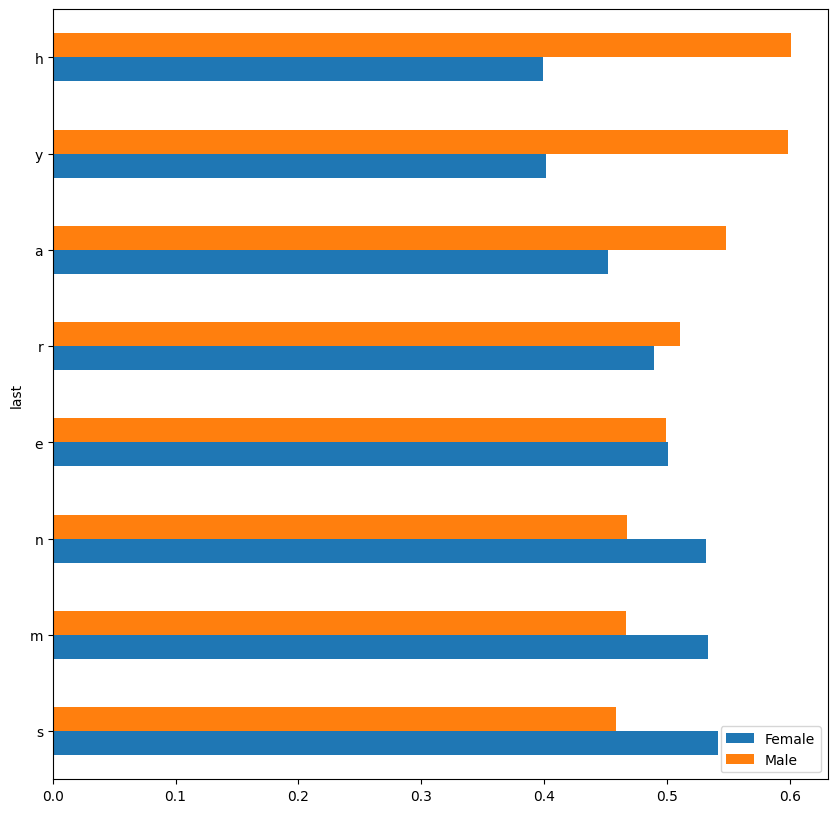

In [63]:
total = last_letter ['Female'] + last_letter['Male']
last_props = pd.DataFrame({
    'Female': last_letter['Female'] / total, # compute the proportions of F & M for each last letter or the name in a dataframe
    'Male': last_letter['Male'] / total,
})
last_props.sort_values('Male').plot.barh(figsize = (10, 10))